<a href="https://colab.research.google.com/github/jgkorman/Statistical-Analysis-In-Python/blob/main/Non_Paraemtric_Modeling_for_continous_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fname = "/content/drive/MyDrive/Delaware/Summer 2023/ICPSR/MLE 2/Lecture 8 Non-parametric models for continous time/whas500.csv"
data = pd.read_csv(fname)
data

,id,age,gender,hr,sysbp,diasbp,bmi,cvd,afb,sho,...,miord,mitype,year,admitdate,disdate,fdate,los,dstat,lenfol,fstat
0,1,83,0,89,152,78,25.54051,1,1,0,...,1,0,1,01/13/1997,01/18/1997,12/31/2002,5,0,2178,0
1,2,49,0,84,120,60,24.02398,1,0,0,...,0,1,1,01/19/1997,01/24/1997,12/31/2002,5,0,2172,0
2,3,70,1,83,147,88,22.14290,0,0,0,...,0,1,1,1/01/1997,1/06/1997,12/31/2002,5,0,2190,0
3,4,70,0,65,123,76,26.63187,1,0,0,...,0,1,1,02/17/1997,02/27/1997,12/11/1997,10,0,297,1
4,5,70,0,63,135,85,24.41255,1,0,0,...,0,1,1,3/01/1997,3/07/1997,12/31/2002,6,0,2131,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,76,1,68,112,88,27.96454,1,1,0,...,0,1,3,7/09/2001,7/10/2001,07/19/2001,1,0,10,1
496,497,76,1,88,208,96,24.26862,1,0,0,...,0,0,3,3/09/2001,3/12/2001,12/31/2002,3,0,662,0
497,498,57,1,123,120,74,42.13576,1,1,0,...,0,0,3,1/05/2001,1/08/2001,12/31/2002,3,0,725,0
498,499,67,0,59,112,62,27.40905,1,0,0,...,0,1,3,07/17/2001,07/18/2001,12/31/2002,1,0,532,0


In [ ]:
!pip install lifelines


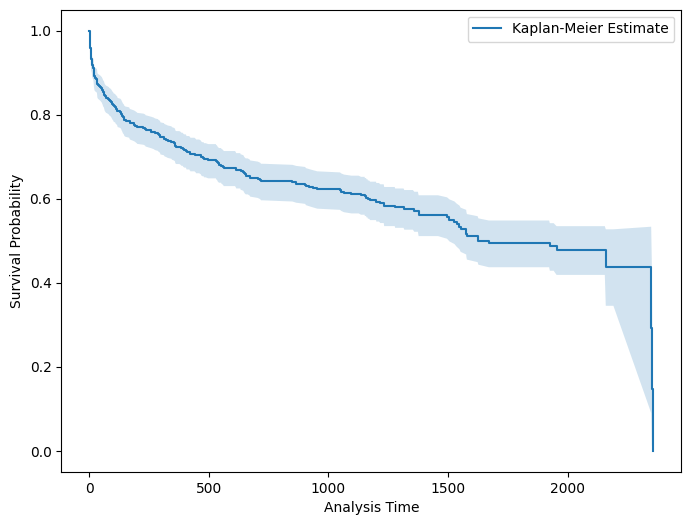

In [ ]:
# Lecture 8 Coding Examples - Non-Parametric Approaches


# Coding Exercise #1 - Kaplan-Meier Plot (Survivor Function)

## Overall

import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Assuming you have loaded your data into a pandas DataFrame named 'whas500'
# and it has columns 'lenfol' for time and 'fstat' for event

# Create the Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier estimator to the data
kmf.fit(data['lenfol'], event_observed=data['fstat'])

# Get the Kaplan-Meier estimate of the survival function
survival_function = kmf.survival_function_

# Get the confidence intervals
confidence_intervals = kmf.confidence_interval_survival_function_

# Create the Kaplan-Meier plot
plt.figure(figsize=(8, 6))
plt.step(survival_function.index, survival_function['KM_estimate'], where='post', label='Kaplan-Meier Estimate')
plt.fill_between(confidence_intervals.index, confidence_intervals['KM_estimate_lower_0.95'], confidence_intervals['KM_estimate_upper_0.95'], alpha=0.2)
plt.xlabel("Analysis Time")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


##**Cox Model Estimation**

In [ ]:
# including 1 covariate


# Coding Exercise #2 - Cox Model Estimation

## Including 1 covariate

import pandas as pd
from lifelines import CoxPHFitter

# Assuming you have loaded your data into a pandas DataFrame named 'data'
# and it has columns 'lenfol' for time, 'fstat' for event, and 'gender' for gender

# Convert 'lenfol' column to numeric (and replace non-numeric values with NaN)
data['lenfol'] = pd.to_numeric(data['lenfol'], errors='coerce')

# Convert 'fstat' column to integers (if it's not already)
data['fstat'] = data['fstat'].astype(int)

# Create the Cox Proportional Hazard model (CoxPHFitter)
cph_model = CoxPHFitter()

# Fit the model with time as the duration, event as the event indicator, and 'gender' as the independent variable
cph_model.fit(data, duration_col='lenfol', event_col='fstat', formula='gender')

# Print the model summary
print(cph_model.summary)


               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
gender     0.381512   1.464497  0.137584        0.111853        0.651171   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
gender                1.118349             1.917785     0.0  2.772946   

                  p  -log2(p)  
covariate                      
gender     0.005555  7.491965  


In [ ]:
# including 2 covariates

import pandas as pd
from lifelines import CoxPHFitter

# Assuming you have loaded your data into a pandas DataFrame named 'data'
# and it has columns 'lenfol' for time, 'fstat' for event, 'gender' for gender, and 'bmi' for BMI

# Convert 'lenfol' column to numeric (and replace non-numeric values with NaN)
data['lenfol'] = pd.to_numeric(data['lenfol'], errors='coerce')

# Convert 'fstat' column to integers (if it's not already)
data['fstat'] = data['fstat'].astype(int)

# Create the Cox Proportional Hazard model (CoxPHFitter)
cph_model = CoxPHFitter()

# Fit the model with time as the duration, event as the event indicator, 'gender', and 'bmi' as independent variables
cph_model.fit(data, duration_col='lenfol', event_col='fstat', formula='gender + bmi')

# Print the model summary
print(cph_model.summary)


               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
gender     0.218950   1.244769  0.141400       -0.058188        0.496089   
bmi       -0.093081   0.911119  0.014914       -0.122313       -0.063850   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
gender                0.943473             1.642285     0.0  1.548450   
bmi                   0.884871             0.938146     0.0 -6.241092   

                      p   -log2(p)  
covariate                           
gender     1.215140e-01   3.040806  
bmi        4.345279e-10  31.099832  


In [ ]:
## Calculate and plot baseline hazard and survivor functions

### Mean-Center BMI variable
### Re-estimate model

import pandas as pd
import numpy as np
from lifelines import CoxPHFitter

# Assuming you have loaded your data into a pandas DataFrame named 'data'
# and it has columns 'lenfol' for time, 'fstat' for event, 'gender' for gender, and 'bmi' for BMI

# Mean-center the 'bmi' variable
data['bmiCent'] = data['bmi'] - data['bmi'].mean()

# Create the Cox Proportional Hazard model (CoxPHFitter)
cph_model = CoxPHFitter()

# Fit the model with time as the duration, event as the event indicator, 'gender', and 'bmiCent' as independent variables
cph_model.fit(data, duration_col='lenfol', event_col='fstat', formula='gender + bmiCent')

# Print the model summary
print(cph_model.summary)


               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
gender     0.218950   1.244769  0.141400       -0.058188        0.496089   
bmiCent   -0.093081   0.911119  0.014914       -0.122313       -0.063850   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
gender                0.943473             1.642285     0.0  1.548450   
bmiCent               0.884871             0.938146     0.0 -6.241092   

                      p   -log2(p)  
covariate                           
gender     1.215140e-01   3.040806  
bmiCent    4.345279e-10  31.099832  


#**Overall**

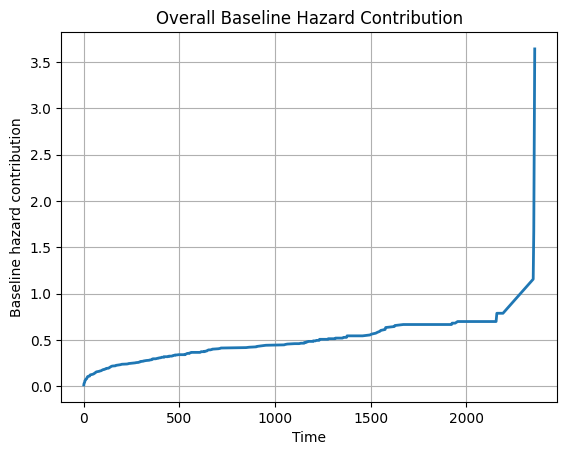

In [ ]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a pandas DataFrame named 'data'
# and it has columns 'lenfol' for time, 'fstat' for event, 'gender' for gender, 'bmi' for BMI, and 'bmiCent' for mean-centered BMI

# Create the Cox Proportional Hazard model (CoxPHFitter)
cph_model = CoxPHFitter()

# Fit the model with time as the duration, event as the event indicator, 'gender', and 'bmiCent' as independent variables
cph_model.fit(data, duration_col='lenfol', event_col='fstat', formula='gender + bmiCent')

# Calculate baseline hazard contribution
bh_pred_over = cph_model.baseline_cumulative_hazard_

# Convert baseline hazard contribution to DataFrame for plotting
bh_pred_over_df = bh_pred_over.reset_index()
bh_pred_over_df.columns = ['time', 'cbh']

# Plot baseline hazard contribution
plt.plot(bh_pred_over_df['time'], bh_pred_over_df['cbh'], linewidth=2)
plt.xlabel("Time")
plt.ylabel("Baseline hazard contribution")
plt.title("Overall Baseline Hazard Contribution")
plt.grid(True)
plt.show()


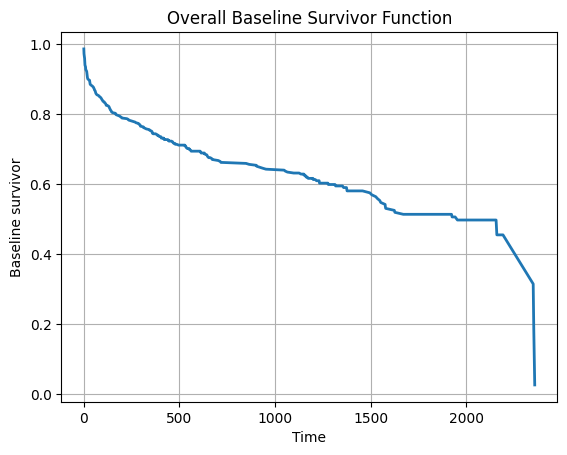

In [ ]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Assuming you have already fitted the CoxPHFitter and obtained 'cph_model'
# Calculate baseline survivor function
bh_pred_over_survivor = np.exp(-cph_model.baseline_cumulative_hazard_)

# Convert baseline survivor function to DataFrame for plotting
bh_pred_over_survivor_df = bh_pred_over_survivor.reset_index()
bh_pred_over_survivor_df.columns = ['time', 'survivor']

# Plot baseline survivor function
plt.plot(bh_pred_over_survivor_df['time'], bh_pred_over_survivor_df['survivor'], linewidth=2)
plt.xlabel("Time")
plt.ylabel("Baseline survivor")
plt.title("Overall Baseline Survivor Function")
plt.grid(True)
plt.show()


#**Gender Specific**

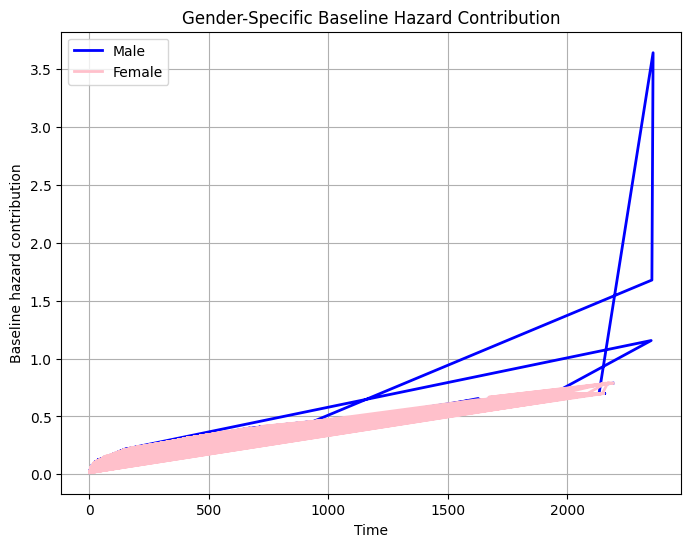

In [ ]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Assuming you have already fitted the CoxPHFitter and obtained 'cph_model'
# Calculate baseline hazard contribution for each gender
bh_pred_over = cph_model.baseline_cumulative_hazard_
data['inthaz'] = data['lenfol'].apply(lambda t: bh_pred_over.loc[t])
data['surv'] = np.exp(-data['inthaz'])

# Plot gender-specific baseline hazard contribution
plt.figure(figsize=(8, 6))
plt.plot(data[data['gender'] == 1]['lenfol'], data[data['gender'] == 1]['inthaz'], color='blue', label='Male', linestyle='-', linewidth=2)
plt.plot(data[data['gender'] == 0]['lenfol'], data[data['gender'] == 0]['inthaz'], color='pink', label='Female', linestyle='-', linewidth=2)
plt.xlabel("Time")
plt.ylabel("Baseline hazard contribution")
plt.title("Gender-Specific Baseline Hazard Contribution")
plt.legend()
plt.grid(True)
plt.show()


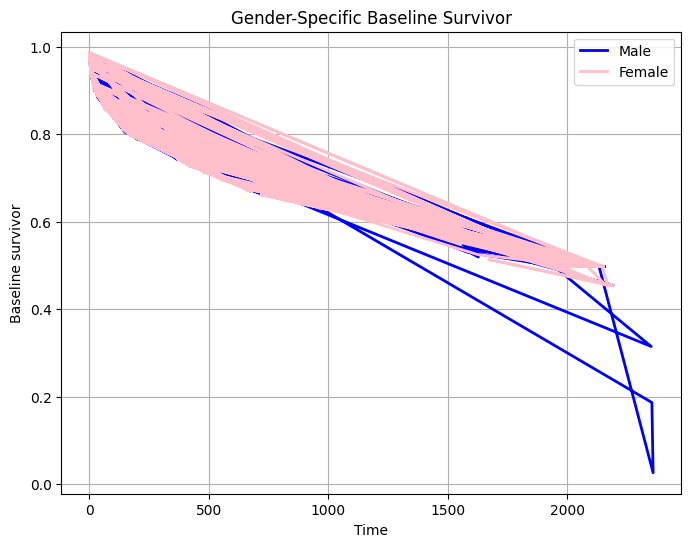

In [ ]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Assuming you have already fitted the CoxPHFitter and obtained 'cph_model'
# Calculate baseline survivor for each gender
data['surv'] = np.exp(-data['inthaz'])

# Plot gender-specific baseline survivor
plt.figure(figsize=(8, 6))
plt.plot(data[data['gender'] == 1]['lenfol'], data[data['gender'] == 1]['surv'], color='blue', label='Male', linestyle='-', linewidth=2)
plt.plot(data[data['gender'] == 0]['lenfol'], data[data['gender'] == 0]['surv'], color='pink', label='Female', linestyle='-', linewidth=2)
plt.xlabel("Time")
plt.ylabel("Baseline survivor")
plt.title("Gender-Specific Baseline Survivor")
plt.legend()
plt.grid(True)
plt.show()
